In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("data1.csv")

data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y=data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [3]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2 ,random_state=42)

x_train=x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


In [4]:
def inizalize_weight_bias(diemantion):
    
    w = np.full((diemantion,1),0.01)
    b = 0.0
    
    return w,b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    
    return y_head

In [5]:
def forward_bakward_propagation(w,b,x_train,y_train):
    
    z = np.dot(w.T,x_train)+b
    y_head = sigmoid(z)
    
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)/x_train.shape[1])
    
    derivative_weight = (np.dot(x_train,((y_head -y_train).T)))/x_train.shape[1]
    derivative_bias = (np.sum(y_head -y_train)/x_train.shape[1])
    
    gradients = {"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost, gradients


In [6]:
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    
    cost_list=[]
    cost_list2=[]
    index=[]

    for i in range (number_of_iteration):
        
        cost,gradients = forward_bakward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w-learning_rate*gradients["derivative_weight"]
        b = b-learning_rate*gradients["derivative_bias"]
        if i%10==0:
            cost_list2.append(cost)
            index.append(i)
            print("cost after iterations %i:%f" %(i,cost))
            
            
            
    parameters = {"weight":w,"bias" : b}
    
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation = "vertical" )
    plt.xlabel("Number of iterations")
    plt.ylabel("cost")
    plt.show()
    
    return parameters , gradients, cost_list
        

In [7]:
def prediction(w,b,x_test):
    
    z=sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros(1,x_test.shape[1])
    
    
    for i in range(z.shape[1]):
        
        if z[0,i]<0.5:
            
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

cost after iterations 0:0.692977
cost after iterations 10:0.499667
cost after iterations 20:0.406616
cost after iterations 30:0.351936
cost after iterations 40:0.315762
cost after iterations 50:0.289862
cost after iterations 60:0.270257
cost after iterations 70:0.254795
cost after iterations 80:0.242214
cost after iterations 90:0.231722
cost after iterations 100:0.222796
cost after iterations 110:0.215080
cost after iterations 120:0.208317
cost after iterations 130:0.202324
cost after iterations 140:0.196961
cost after iterations 150:0.192121
cost after iterations 160:0.187722
cost after iterations 170:0.183698
cost after iterations 180:0.179997
cost after iterations 190:0.176577
cost after iterations 200:0.173402
cost after iterations 210:0.170443
cost after iterations 220:0.167676
cost after iterations 230:0.165080
cost after iterations 240:0.162638
cost after iterations 250:0.160334
cost after iterations 260:0.158155
cost after iterations 270:0.156091
cost after iterations 280:0.154

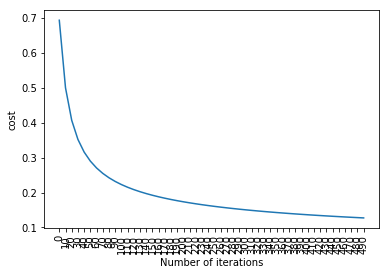

TypeError: data type not understood

In [8]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,number_of_iteration):
    
    diemantion = x_train.shape[0]
    w,b = inizalize_weight_bias(diemantion)
    
    parameters, gradients, cost_list = update(w,b,x_train,y_train,learning_rate,number_of_iteration)
    
    y_prediction_test = prediction(parameters["weight"],parameters["bias"],x_test)
    
    print("test_accuracy : {} %".format(100 -np.mean(np.abs(y_prediction_test - y_test))*100))
    
    
logistic_regression(x_train,y_train,x_test,y_test,1,500)    
    
    